In [6]:
import numpy as np

In [28]:
a = 1 + 1j
b = 1 - 1j

In [29]:
x = np.array([a, b])

In [8]:
def normalize(vector):
    def coeffLength(coeff):
        return np.real(coeff*np.conj(coeff))
    def totalLength():
        sum = 0
        for i in vector:
            sum += coeffLength(i)
        return sum**(0.5)
    totalSum = np.array(totalLength())
    return vector/totalSum

In [9]:
normalize(x)

array([0.5+0.5j, 0.5-0.5j])

In [10]:
#inner product, #outerproduct

In [11]:
def innerproduct(A, B):
    return B*np.matrix(A).getH()

In [12]:
print(innerproduct(x, x))

[[4.+0.j]]


In [30]:
def outerproduct(A, B):
    return np.outer(A, B)

In [31]:
outerproduct(x, x)

array([[0.+2.j, 2.+0.j],
       [2.+0.j, 0.-2.j]])

In [ ]:
#linearly indep orthogonal

In [19]:
matrix = np.array(
    [
        [0, 1 ,5 ,20],
        [3, 0, 4, 15],
        [0, 1, 9, 36],
        [1, 7, 0, 0]
    ])

In [20]:
vectorA = np.array([1, 1j])
vectorB = np.array([1j, 1])

In [21]:
def isLinIndep(M):
    return (M.shape[1] == np.linalg.matrix_rank(M))

In [22]:
isLinIndep(matrix)

True

In [23]:
def isOrtho(A, B):
    return (innerproduct(A, B) == 0)

In [24]:
isOrtho(vectorA, vectorB)

matrix([[ True]])

In [ ]:
#unitary, kroneckor product

In [34]:
M = np.array(
    [
        [1, 1],
        [1, -1],
    ])

In [35]:
def isUnitary(M):
    return np.allclose(np.eye(M.shape[0]), np.matrix(M).getH()*M)

In [36]:
isUnitary(M)

False

In [47]:
def tensordot(A, B):
    return np.kron(A, B)

In [48]:
tensordot(M, M)

array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])

In [5]:
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [7]:
circ = QuantumCircuit(2)

In [8]:
circ.h(0)

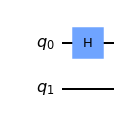

In [9]:
circ.draw('mpl')

In [10]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
output = result.get_statevector(circ, decimals=3)

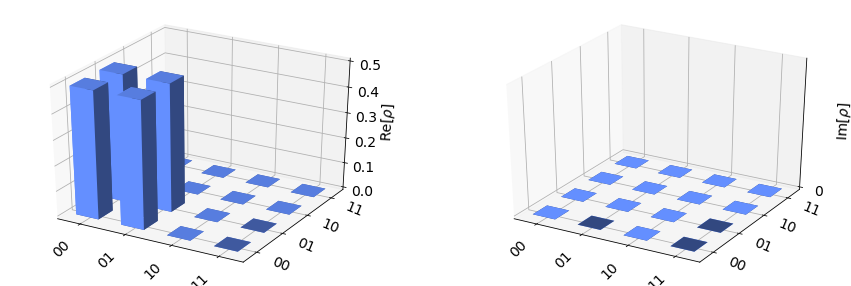

In [11]:
visualization.plot_state_city(output)

In [21]:
circ2 = QuantumCircuit(6)

In [22]:
circ2.h(1)
circ2.x(2)
circ2.y(3)
circ2.h(4)
circ2.z(4)
circ2.h(5)
circ2.rz(pi/4, 5)

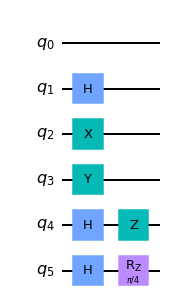

In [23]:
circ2.draw('mpl')

In [24]:
qobj = assemble(circ2)
state = backend.run(qobj).result().get_statevector()

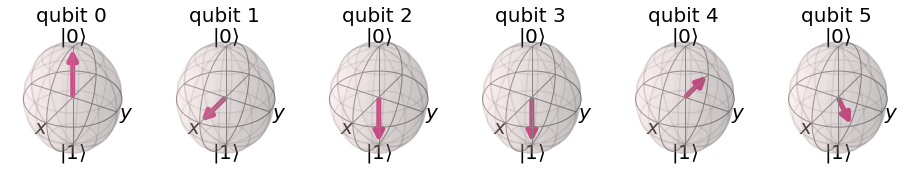

In [25]:
visualization.plot_bloch_multivector(state)